## Orange

In [1]:
import numpy as np
import pandas as pd
import Orange
from orangecontrib.associate.fpgrowth import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = Orange.data.Table('language_data.csv')
data

[[Java, Python, Ruby, SQL],
 [Clojure, Elixir, Erlang, Haskell],
 [Assembly, C, C++, C#],
 [Groovy, Java, JavaScript, Lua],
 [Assembly, C, C++, C#],
 ...
]

In [3]:
X, mapping = OneHot.encode(data, include_class=True)

In [4]:
itemsets = dict(frequent_itemsets(X, .1))
print(len(itemsets))

18


In [5]:
df = pd.read_csv('language_data.csv')
df = df.values.flatten()
df = [i.strip() for i in df]
print(len(df))
elem, count = np.unique(df, return_counts=True)
elem = list(elem)
count = list(count)
print(np.asarray((elem, count)))

8768
[['Assembly' 'C' 'C#' 'C++' 'Clojure' 'CoffeeScript' 'Common Lisp' 'Dart'
  'Elixir' 'Erlang' 'F#' 'Go' 'Groovy' 'Hack' 'Haskell' 'Java'
  'JavaScript' 'Julia' 'Lua' 'Matlab' 'Objective-C' 'PHP' 'Perl' 'Python'
  'R' 'Ruby' 'Rust' 'SQL' 'Scala' 'Smalltalk' 'Swift' 'TypeScript'
  'VB.NET' 'VBA' 'Visual Basic 6']
 ['426' '828' '856' '1166' '88' '127' '87' '52' '63' '47' '81' '406' '44'
  '36' '205' '1027' '1006' '22' '82' '95' '97' '422' '56' '650' '89'
  '146' '70' '245' '56' '3' '106' '50' '18' '6' '10']]


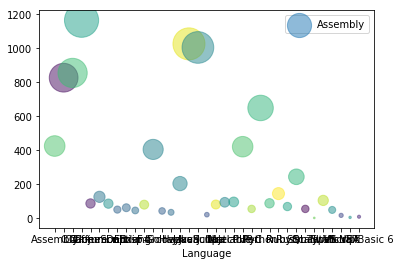

In [6]:
np.random.seed(500)
N = len(elem)
colors = np.random.rand(N)

area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(elem, count, s=count, c=colors, alpha=0.5)
plt.xlabel('Language')
plt.legend(elem)
plt.show()

In [7]:
count[elem.index('Python')]

650

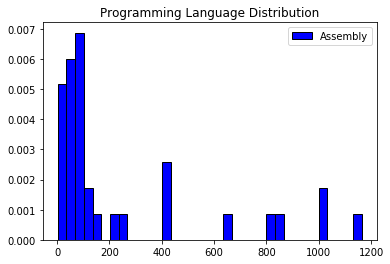

In [8]:
from itertools import cycle
cycol = cycle('bgrcmk')

plt.rcParams['legend.numpoints'] = len(elem)

n, bins, patches = plt.hist(count, N, density=1, histtype='bar', edgecolor='black', color=next(cycol))
plt.legend(elem)
plt.title('Programming Language Distribution')
plt.show()